# Understanding Regression Algorithms

Regression algorithms are a type of supervised learning algorithm that predict continuous output values. The goal of regression is to find the relationship between independent variables (features) and dependent variables (target). These algorithms are useful for tasks like predicting prices, temperatures, salaries, or other real-valued outputs.

Here are some key regression algorithms:

- Linear Regression: Finds the best-fitting straight line through the data.
- Random Forest Regression: Uses multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.
- Gradient Boosting Regression: Builds an ensemble of weak models (often decision trees) sequentially, where each new model corrects the errors made by previous models.

### Scenario: Predicting Employee Salaries Based on Experience and Education

In [20]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#Read the data 
salary_df = pd.read_csv('Salary_dataset.csv')
print(salary_df)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [22]:
salary_df = salary_df.drop('Unnamed: 0', axis=1) #Removing the unnamed column

In [23]:
print(salary_df) # Displaying the dataset

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


In [26]:
# Step 2: Data Preprocessing (In this case, the downloaded dataset is already clean)
X = salary_df[['YearsExperience']]  # Feature
y = salary_df['Salary']  # Target

In [27]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Model Training:
#We use Linear Regression, which is part of Scikit-Learn, to train our model on the training data

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

Model Evaluation:
We calculate the Mean Squared Error (MSE) and R-squared (R²) value to evaluate how well the model is predicting salaries. The R-squared value indicates how much of the variance in the dependent variable (salary) is explained by the independent variables (experience). An R² value close to 1 means a good fit.

In [33]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 49830096.855908394
R-squared Value: 0.9024461774180497


Prediction:
We use the trained model to predict the salary of an employee with 3 years of experience. The predicted salary is displayed.

In [37]:
# Step 5: Make Predictions for New Data
# Predict the salary for an employee with 3 years of experience
new_employee = [[3.0]]
predicted_salary = model.predict(new_employee)
print(predicted_salary)

[52651.64744857]


/Users/anisha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Visualization:
We plot a scatter plot showing the relationship between Experience and Salary, with the actual salaries shown in blue and the predicted line shown in red.

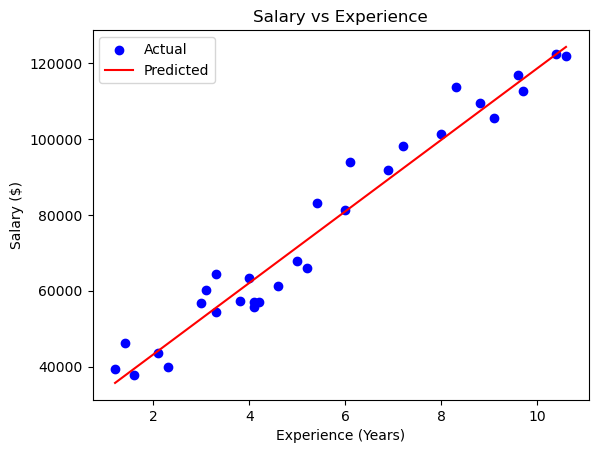

In [39]:
# Visualize the relationship between Experience, Education, and Salary
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'], color='blue', label='Actual')
plt.plot(salary_df['YearsExperience'], model.predict(X), color='red', label='Predicted')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Salary vs Experience')
plt.legend()
plt.show()